<a href="https://colab.research.google.com/github/gabosantos/2324CS280UPD/blob/main/CS_280_Lesson_5_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


In this lesson you will learn:
* What is ensemble learning
* What are the different types of ensemble learning
* How to perform ensemble learning for classification problems

# Concepts

## Ensemble Learning

Up to this point, we've been talking about machine learning <font color="#9980FA">models that work individually</font>. However, in practice, different models can give different predictions. So, how do we bring all these predictions together? One approach is to use ensemble learning.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1M2K3kDWbf-GaBj56lc-hYYgVjthH0VL-" height="360"/></td></tr></table>
<center><small>[HML]</small></center>

<br>

<font color="#9980FA">Ensemble learning</font> draws inspiration from the idea of the "wisdom of the crowd." In this approach, we combine the predictions of a collection of predictors like classifiers or regressors. This often leads to more accurate predictions compared to what the best individual predictor can achieve. A collection of predictors is referred to as an ensemble, which is why this method is called Ensemble Learning, and the algorithms used for ensemble learning are known as Ensemble methods [HML].

Ensemble methods come in various forms, including voting, bagging, boosting. In this lesson, we'll discuss each of these methods.

## Voting

Suppose we have trained a few classifiers (see figure above), each one achieving about 80% accuracy. A very simple way to combine their predictions is to choose the one that gets the most votes; in other words, the prediction that most classifiers agree upon. This classifier, which we call a <font color="#9980FA">hard voting classifier</font>, relies on the majority's choice [HML].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1CSGp5_jFIZGISbtB94lKjng4my_aVAVl" height="360"/></td></tr></table>
<center><small>[HML]</small></center>

<br>

Surprisingly, the voting classifier often outperforms the best individual classifier. Even if each classifier is weak (aka a <font color="#9980FA">weak learner</font> that is only slightly better than random guessing), the ensemble can become a strong learner with high accuracy. This is influenced by the law of large numbers: as we accumulate more data (or, in this case, independent models), our predictions get closer and closer to the actual outcome. Diversity is key in making better ensembles [HML].

## Bagging and Pasting

Using different training algorithms is one way of making an ensemble of classifiers. Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called <font color="#9980FA">bagging</font> (short for bootstrap aggregating). When sampling is performed without replacement, it is called <font color="#9980FA">pasting</font> [HML].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1tEkErwNr-KZU7IYeI0qetHLRXCK_uTxv" height="360"/></td></tr></table>
<center><small>[HML]</small></center>

<br>

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the <font color="#9980FA">statistical mode</font> (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression.

Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set [HML].


## Random Forests

A <font color="#9980FA">Random Forest</font> is an ensemble of Decision Trees, generally trained via the bagging method. It introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. The algorithm results in greater tree diversity, which (again) trades a higher bias for a lower variance, generally yielding an overall better model [HML].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1DDfy3zg01x3iyi2h0KCqvhtH6JWWW2X_" height="360"/></td></tr></table>
<center><small>Miro @Medium</small></center>

<br>

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature [HML], which we'll discuss in the succeeding lesson.


## Boosting

<font color="#9980FA">Boosting</font> (originally called hypothesis boosting) refers to any ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor [HML].

<font color="#9980FA">AdaBoost</font> (short for Adaptive Boosting) is a boosting method designed to improve upon its predecessor by focusing more on the training samples that the predecessor underfitted [HML].


<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=124q4NbHyGmnduSesAEby8wJN2meC50Ef" height="360"/></td></tr></table>
<center><small>[HML]</small></center>

<br>

AdaBoost works as follows [HML]:

Each <font color="#9980FA">sample weight</font> $w^{(i)}$ is initially set to $1/m$, for $m$ training samples. When the first predictor is trained, its <font color="#9980FA">weighted error rate</font> $r_1$ is computed on the training set:

$\begin{equation}
\Large
r_j = \frac{\sum_{i=1}^{m} w^{(i)} \cdot I\left(y^{(i)} \neq \widehat{y}_j^{(i)}\right)}{\sum_{i=1}^{m} w^{(i)}}
\end{equation}$

where:
* $r_j$ is the weighted error rate of the $j$th predictor.
* $w^{(i)}$ are the sample weights for the $i$th training example.
* $y^{(i)}$ is the true label of the $i$th training sample.
* $\widehat{y}_j^{(i)}$ is the prediction made by the jth predictor for the $i$th training sample.
* $m$ is the number of training sample.

<br>

The <font color="#9980FA">predictor's weight</font> $\alpha_j$ is then computed, where $\eta$ is the learning rate hyperparameter (defaults to 1):

$\begin{equation}
\Large
\alpha_j = \eta \log\left(\frac{1 - r_j}{r_j}\right)
\end{equation}$

The more accurate the predictor is, the higher its weight will be. If it is just guessing randomly, then its weight will be close to zero. However, if it is most often wrong (i.e., less accurate than random guessing), then its weight will be negative.

<br>

Next, the AdaBoost algorithm updates the sample weights, which boosts the weights of the misclassified samples.

$\begin{equation}
\Large
w^{(i)} \leftarrow
\begin{cases}
w^{(i)} & \text{if } \widehat{y}_j^{(i)} = y^{(i)} \\
w^{(i)} \exp(\alpha_j) & \text{if } \widehat{y}_j^{(i)} \neq y^{(i)}
\end{cases}
\end{equation}$

Then all the sample weights are normalized.

Finally, a new predictor is trained using the updated weights, and the whole process is repeated. The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.

<br>

To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights $\alpha_j$. The predicted class is the one that receives the majority of weighted votes:

$\begin{equation}
\Large
\widehat{y}(\mathbf{x}) = \text{argmax}_{k} \sum_{j=1}^{N} \alpha_j \cdot I\left(\widehat{y}_j(\mathbf{x}) = k\right)
\end{equation}$


Another popular boosting algorithm is <font color="#9980FA">Gradient Boosting</font>. Like AdaBoost, it sequentially adds predictors to an ensemble to correct each other. However, instead of adjusting sample weights at each step, Gradient Boosting focuses on fitting the new predictor to the <font color="#9980FA">residual errors</font> of the previous predictor. [HML].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1k0aOmytc1FSDkwh_rLT5iNh7CDTt5Y3p" height="420"/></td></tr></table>
<center><small>[HML]</small></center>

# Codes

## Ensemble learning by voting

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

n=1000
X, y = make_moons(n_samples=n, noise=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
dtr_clf = DecisionTreeClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('dt', dtr_clf),
                                          ('svc', svm_clf)],
                                          voting='hard')


for clf in (log_clf, dtr_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),4))

LogisticRegression 0.865
DecisionTreeClassifier 0.955
SVC 0.965
VotingClassifier 0.9675


## Ensemble learning by bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1)
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

for clf in (bag_clf, rf_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),4))

BaggingClassifier 0.9675
RandomForestClassifier 0.9625


## Ensemble learning by boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                    max_depth=1, random_state=0).fit(X_train, y_train)

for clf in (ada_clf, gb_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),4))

AdaBoostClassifier 0.9625
GradientBoostingClassifier 0.965


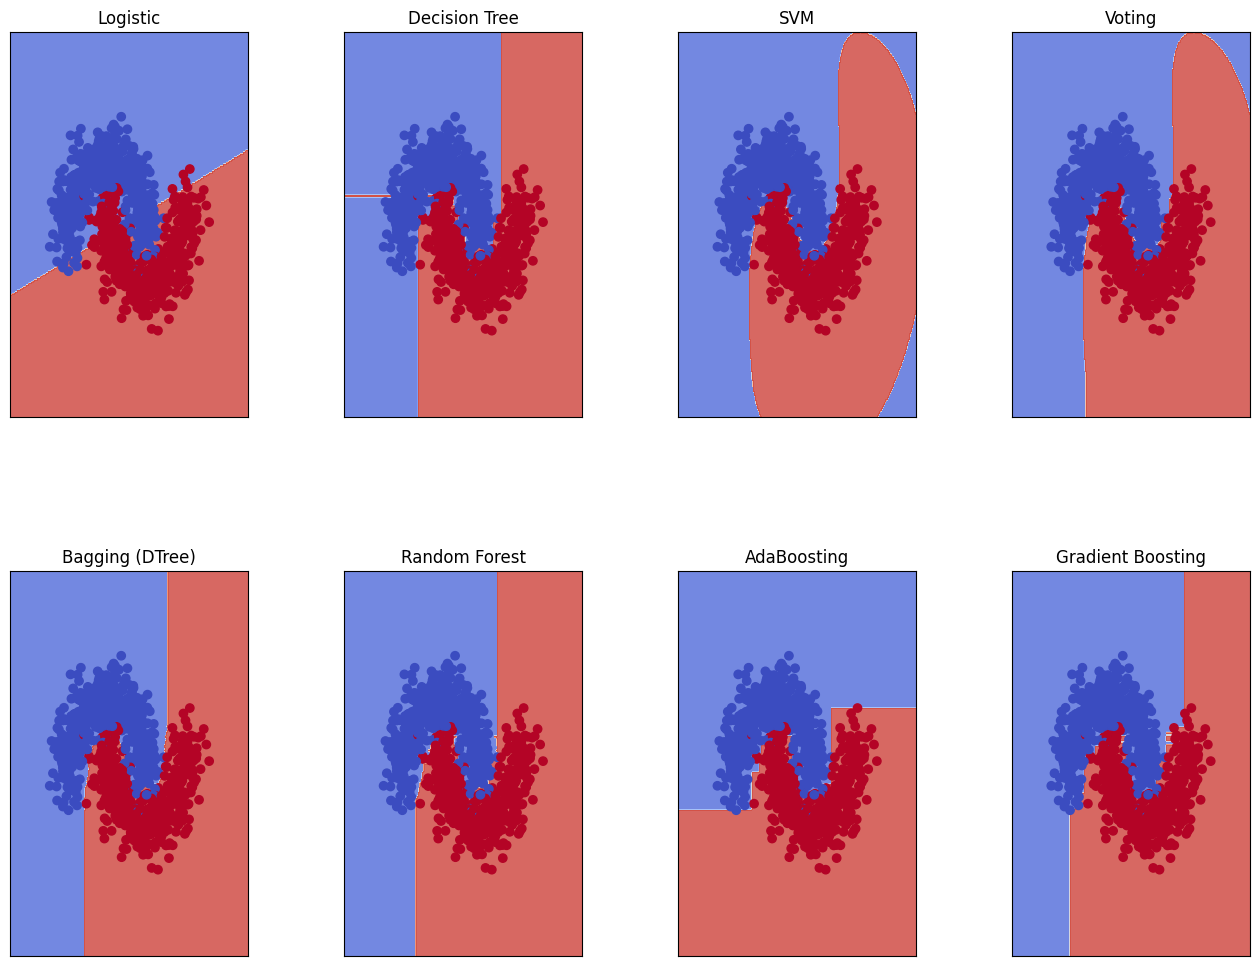

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = [log_clf, dtr_clf, svm_clf, voting_clf,
          bag_clf, rf_clf,
          ada_clf, gb_clf]

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Logistic', 'Decision Tree', 'SVM', 'Voting',
          'Bagging (DTree)', 'Random Forest',
          'AdaBoosting', 'Gradient Boosting']

plt.figure(figsize=(16, 12))
for i, clf in enumerate(models):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 4, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  # plt.xlabel('Sepal length')
  # plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()

# Challenges

Try ensemble learning on the digit classification problem.

# References

[AIMA] Russell and Norvig, *Artificial Intelligence: A Modern Approach*, 4th ed, 2020

[HML] Géron, *Hands-on Machine Learning with Scikit-Learn*, Keras, and TensorFlow, 2017

[PRML] Bishop, *Pattern Recognition and Machine Learning*, 2006